## Install Google Dependencies

In [0]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 19.0MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# 1eIadJHDXgxFL6qdbpmVDyA3LHKVNCd0o
download = drive.CreateFile({'id': '1eIadJHDXgxFL6qdbpmVDyA3LHKVNCd0o'})
download.GetContentFile('1. DEMO_BANK_INFO.csv')

## Main Code

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv('1. DEMO_BANK_INFO.csv')
df.head()

,BANK_ID,AGE,MARITAL_STATUS,POSTAL_CD,GENDER,EDUCATION,STATE,OCCUPATION,OCC_DESC,CUST_SEGMENT,...,CC_CNT,HP_CNT,TL_CNT,TLi_CNT,INS_CREDIT_LIFE_CNT,INS_LIFE_CNT,INS_NON_LIFE_CNT,INS_CNT,loan_application_date,DELQ_FLG
0,13398,42,Single,48020.0,Male,No Formal Education / Unknown,Selangor Darul Ehsan,"Associate Professionals, Administrative/Specia...",MANAGER OR SUPERVISOR,MASS,...,2,0,0,0,0,0,0,0,31-Dec-17,N
1,16152,37,Married,73430.0,Male,No Formal Education / Unknown,Negeri Sembilan Darul Khusus,Associate Professionals/Technician/Asst/Superv...,OTHERS,MASS,...,0,0,0,0,0,0,0,0,31-Dec-17,N
2,18560,34,Single,70450.0,Male,No Formal Education / Unknown,Negeri Sembilan Darul Khusus,"Clerical Support Workers, Office - General Off...",NON-EXECUTIVE,MASS,...,0,0,0,0,0,0,0,0,31-Dec-17,N
3,18568,34,Married,47130.0,Male,College/ University,Selangor Darul Ehsan,Associate Professionals/Technician/Asst/Superv...,EXECUTIVE AND ABOVE,MASS,...,0,0,0,0,0,0,0,0,31-Dec-17,N
4,26717,26,Single,5150.0,Female,NaN,Kedah Darul Aman,"Professionals, Administration/Policy Analyst/M...",EXECUTIVE AND ABOVE,MASS,...,0,0,0,0,0,0,0,0,31-Dec-17,N


### Target variable exploration - Delinquency

In [0]:
df['DELQ_FLG'].value_counts()

N    12268
Y      931
Name: DELQ_FLG, dtype: int64

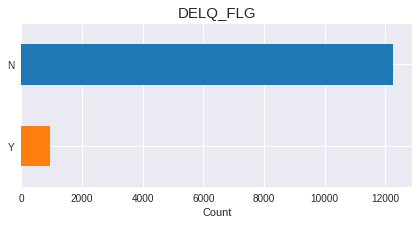

In [0]:
f, ax = plt.subplots(figsize=(7, 3))

df['DELQ_FLG'].value_counts().plot.barh(ax=ax, color=['tab:blue', 'tab:orange'])
ax.invert_yaxis()
ax.set_title('DELQ_FLG', fontsize=15)
ax.set_xlabel('Count')
plt.show()

### Input variable exploration

#### Age

In [0]:
df['AGE'].describe()

count    13199.000000
mean        34.076066
std          7.810927
min         21.000000
25%         28.000000
50%         32.000000
75%         39.000000
max         59.000000
Name: AGE, dtype: float64

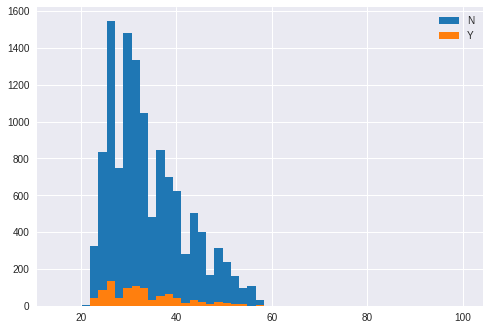

In [0]:
bins = np.linspace(15, 100, 50)

plt.hist(df['AGE'].loc[df['DELQ_FLG'] == 'N'], bins, label='N', color='tab:blue')
plt.hist(df['AGE'].loc[df['DELQ_FLG'] == 'Y'], bins, label='Y', color='tab:orange')

plt.legend(loc='upper right')
plt.show()

### Marital Status - MARITAL_STATUS	

In [0]:
df['MARITAL_STATUS'].value_counts()

Single                    8192
Married                   4915
Divorced                    68
Widow                       17
Not Applicable / Blank       7
Name: MARITAL_STATUS, dtype: int64

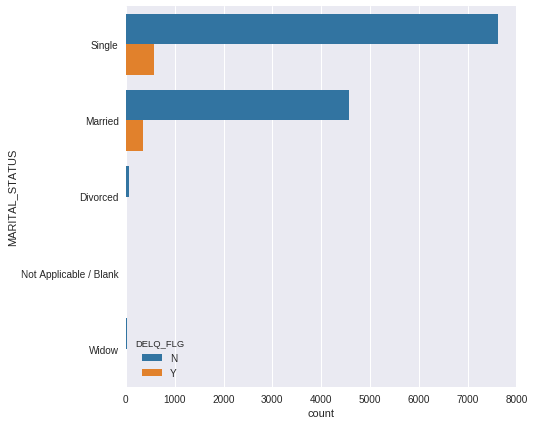

In [0]:
f, ax = plt.subplots(figsize=(7, 7))
sns.countplot(y="MARITAL_STATUS", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

#### Education - EDUCATION

In [0]:
df['EDUCATION'].value_counts()

No Formal Education / Unknown    5979
College/ University              1858
Secondary                        1809
Bachelor                          810
Professional                       90
Primary                            39
Masters                            35
Diploma                            12
Doctorate                           4
Name: EDUCATION, dtype: int64

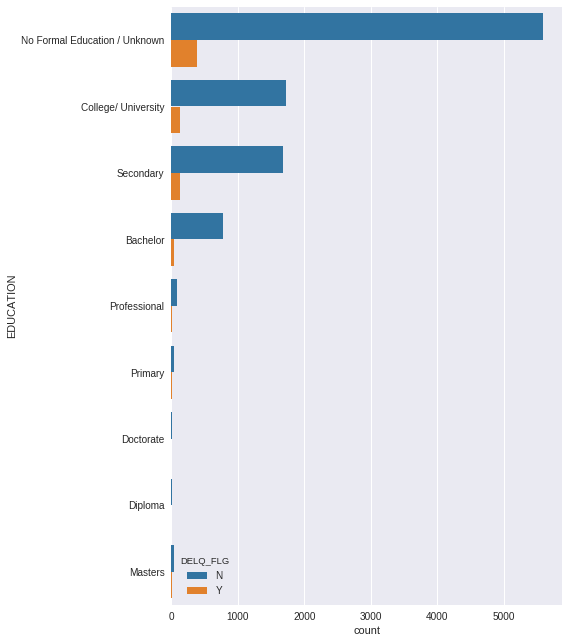

In [0]:
f, ax = plt.subplots(figsize=(7, 11))
sns.countplot(y="EDUCATION", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### State - STATE

In [0]:
df['STATE'].value_counts()

Selangor Darul Ehsan            4516
Johor Darul Takzim              1832
WP - Kuala Lumpur               1417
Pulau Pinang                     885
Kedah Darul Aman                 720
Perak Darul Ridzuan              697
Negeri Sembilan Darul Khusus     694
Sarawak                          468
Sabah                            446
Pahang Darul Makmur              413
Melaka                           410
Terengganu Darul Iman            276
Kelantan Darul Naim              266
WP - Labuan                       54
Perlis Indra Kayangan             52
WP - Putrajaya                    45
STATE_INFO_NOT_PROVIDED            8
Name: STATE, dtype: int64

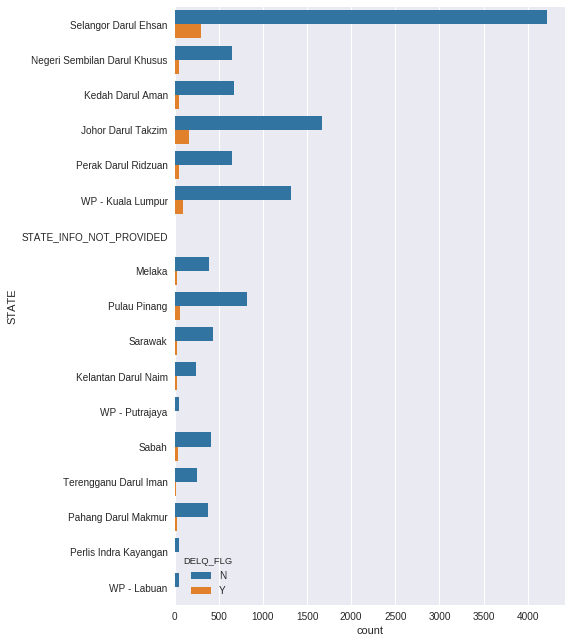

In [0]:
f, ax = plt.subplots(figsize=(7, 11))
sns.countplot(y="STATE", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Description of Occupation - OCC_DESC	

In [0]:
df['OCC_DESC'].value_counts()

NON-EXECUTIVE            3101
EXECUTIVE AND ABOVE      2774
MANAGER OR SUPERVISOR    2485
OTHERS                   2178
STUDENT                  1417
PROFESSIONAL              623
GOVT SERVANT              355
CEO/DIRECTOR              138
SELF EMPLOYED              85
HOUSEWIFE                  38
RETIRED                     5
Name: OCC_DESC, dtype: int64

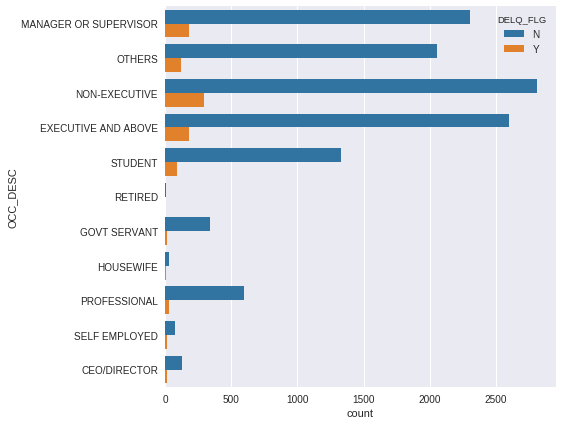

In [0]:
f, ax = plt.subplots(figsize=(7, 7))
sns.countplot(y="OCC_DESC", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Customer Wealth Segment - CUST_SEGMENT

In [0]:
df['CUST_SEGMENT'].value_counts()

MASS         13119
PREFERRED       41
PRIME           39
Name: CUST_SEGMENT, dtype: int64

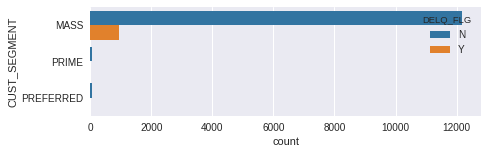

In [0]:
f, ax = plt.subplots(figsize=(7, 2))
sns.countplot(y="CUST_SEGMENT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Count of Customer Dependent - DEPENDENT_CNT



In [0]:
df['DEPENDENT_CNT'].value_counts()

0    11863
1      455
2      452
3      263
4      105
5       40
6       14
7        5
8        2
Name: DEPENDENT_CNT, dtype: int64

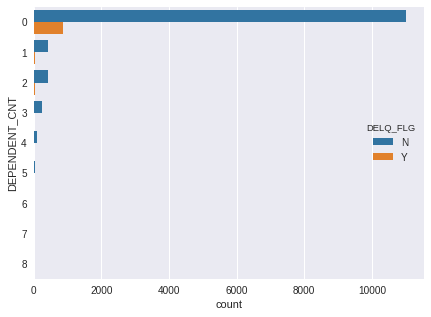

In [0]:
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(y="DEPENDENT_CNT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Current Account Average Balance - CA_AVG_BAL

In [0]:
df['CA_AVG_BAL'].describe()

count       262.000000
mean       6200.049820
std       24370.823219
min           0.000000
25%          21.340000
50%         418.875000
75%        3091.015807
max      226197.140600
Name: CA_AVG_BAL, dtype: float64

In [0]:
len(df[np.invert(np.isnan(df['CA_AVG_BAL']))]['CA_AVG_BAL'])

262

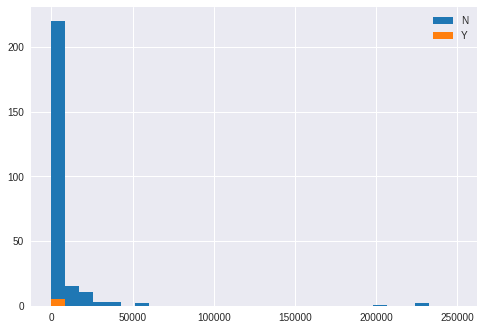

In [0]:
bins = np.linspace(0, 250000, 30)

plt.hist(df[np.invert(np.isnan(df['CA_AVG_BAL']))]['CA_AVG_BAL'].loc[df['DELQ_FLG'] == 'N'], bins, label='N', color='tab:blue')
plt.hist(df[np.invert(np.isnan(df['CA_AVG_BAL']))]['CA_AVG_BAL'].loc[df['DELQ_FLG'] == 'Y'], bins, label='Y', color='tab:orange')

plt.legend(loc='upper right')
plt.show()

Skewness: 7.864761


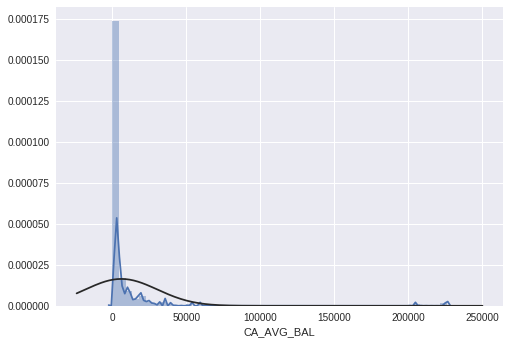

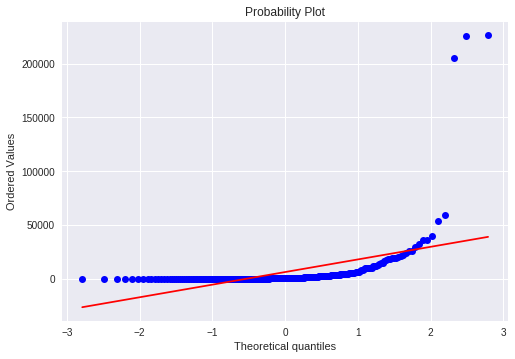

In [0]:
#skewness
print("Skewness: %f" % df[np.invert(np.isnan(df['CA_AVG_BAL']))]['CA_AVG_BAL'].skew())
#histogram and normal probability plot
sns.distplot(df[np.invert(np.isnan(df['CA_AVG_BAL']))]['CA_AVG_BAL'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[np.invert(np.isnan(df['CA_AVG_BAL']))]['CA_AVG_BAL'], plot=plt)

### Savings Account - SA_AVG_BAL

In [0]:
df['SA_AVG_BAL'].describe()

count     11308.000000
mean       1190.601524
std        4595.197719
min           0.000000
25%         106.439758
50%         347.033500
75%         902.128637
max      243768.977000
Name: SA_AVG_BAL, dtype: float64

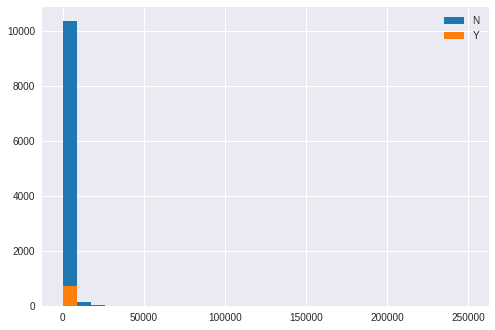

In [0]:
bins = np.linspace(0, 250000, 30)

plt.hist(df[np.invert(np.isnan(df['SA_AVG_BAL']))]['SA_AVG_BAL'].loc[df['DELQ_FLG'] == 'N'], bins, label='N', color='tab:blue')
plt.hist(df[np.invert(np.isnan(df['SA_AVG_BAL']))]['SA_AVG_BAL'].loc[df['DELQ_FLG'] == 'Y'], bins, label='Y', color='tab:orange')

plt.legend(loc='upper right')
plt.show()

Skewness: 22.214418


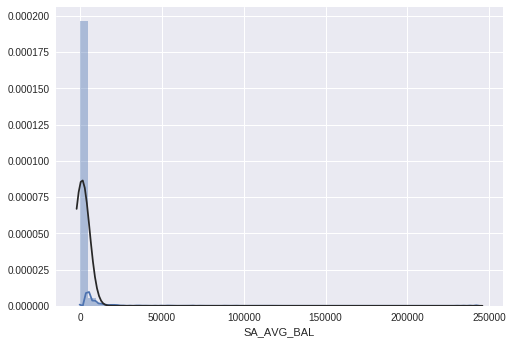

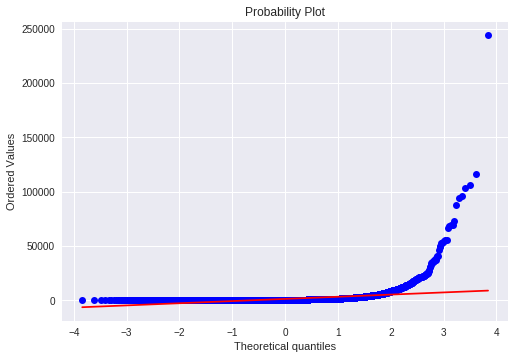

In [0]:
#skewness
print("Skewness: %f" % df[np.invert(np.isnan(df['SA_AVG_BAL']))]['SA_AVG_BAL'].skew())
#histogram and normal probability plot
sns.distplot(df[np.invert(np.isnan(df['SA_AVG_BAL']))]['SA_AVG_BAL'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[np.invert(np.isnan(df['SA_AVG_BAL']))]['SA_AVG_BAL'], plot=plt)

### Count of Conventional Current Accounts - CA_CNT

In [0]:
df['CA_CNT'].describe()

count    262.000000
mean       1.087786
std        0.309374
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: CA_CNT, dtype: float64

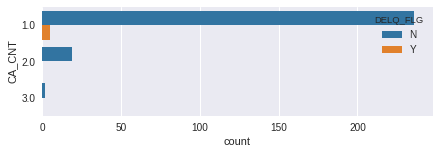

In [0]:
f, ax = plt.subplots(figsize=(7, 2))
sns.countplot(y="CA_CNT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Count of Conventional Current Accounts - SA_CNT

In [0]:
df['SA_CNT'].describe()

count    11308.000000
mean         1.072250
std          0.275141
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: SA_CNT, dtype: float64

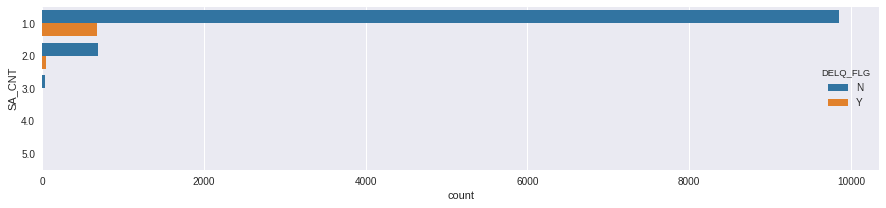

In [0]:
f, ax = plt.subplots(figsize=(15, 3))
sns.countplot(y="SA_CNT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Count of Credit Cards - CC_CNT

In [0]:
df['CC_CNT'].describe()

count    13199.000000
mean         0.675885
std          1.030650
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: CC_CNT, dtype: float64

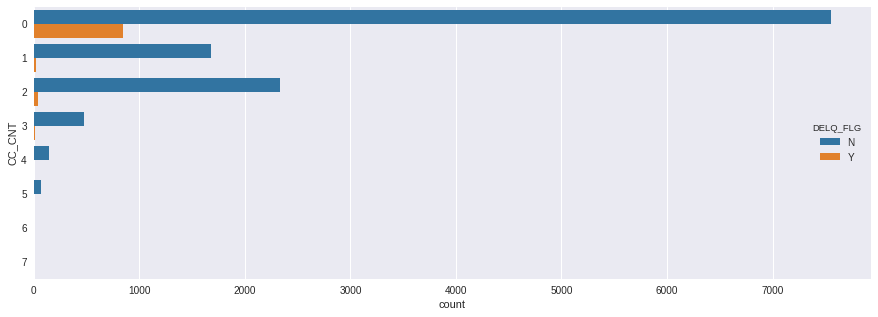

In [0]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="CC_CNT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Count of Car Loan - HP_CNT

In [0]:
df['HP_CNT'].describe()

count    13199.000000
mean         0.138723
std          0.359003
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: HP_CNT, dtype: float64

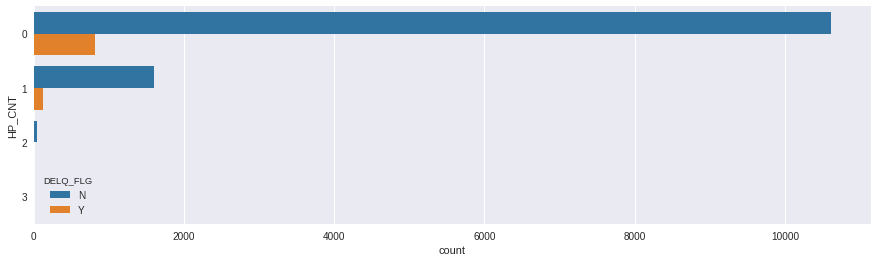

In [0]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="HP_CNT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Count of Conventional Term Loan

In [0]:
df['TL_CNT'].describe()

count    13199.000000
mean         0.000985
std          0.031369
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: TL_CNT, dtype: float64

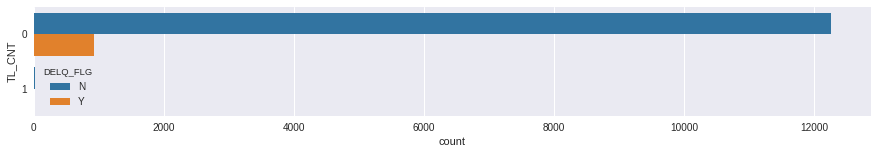

In [0]:
f, ax = plt.subplots(figsize=(15, 2))
sns.countplot(y="TL_CNT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Count of Islamic Term Loan

In [0]:
df['TLi_CNT'].describe()

count    13199.000000
mean         0.000606
std          0.024613
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: TLi_CNT, dtype: float64

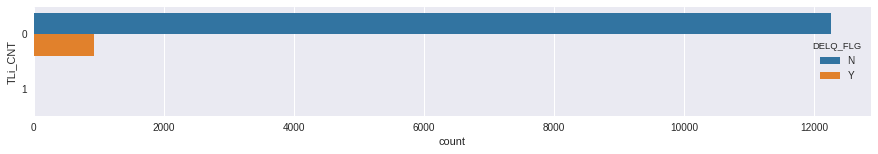

In [0]:
f, ax = plt.subplots(figsize=(15, 2))
sns.countplot(y="TLi_CNT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Count of Credit Life Insurance

In [0]:
df['INS_CREDIT_LIFE_CNT'].describe()

count    13199.000000
mean         0.200394
std          0.474614
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: INS_CREDIT_LIFE_CNT, dtype: float64

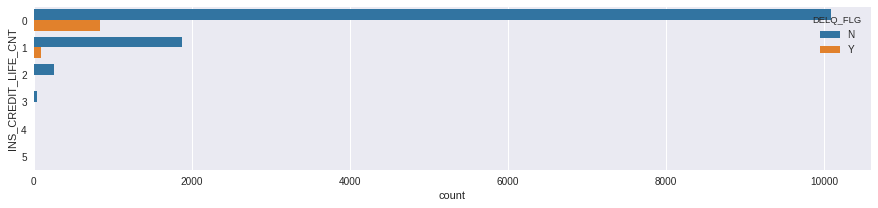

In [0]:
f, ax = plt.subplots(figsize=(15, 3))
sns.countplot(y="INS_CREDIT_LIFE_CNT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Count of Life Insurance

In [0]:
df['INS_LIFE_CNT'].describe()

count    13199.000000
mean         0.101220
std          0.370406
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: INS_LIFE_CNT, dtype: float64

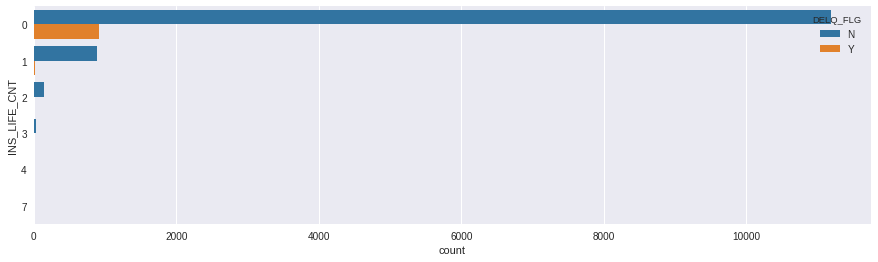

In [0]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="INS_LIFE_CNT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Count of Non Life Insurance

In [0]:
df['INS_NON_LIFE_CNT'].describe()

count    13199.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: INS_NON_LIFE_CNT, dtype: float64

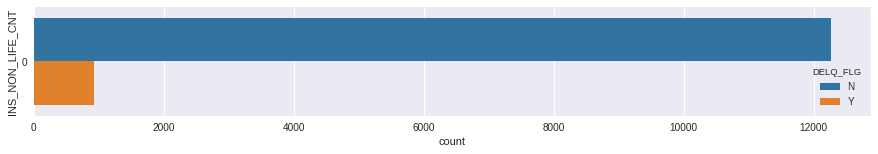

In [0]:
f, ax = plt.subplots(figsize=(15, 2))
sns.countplot(y="INS_NON_LIFE_CNT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')

### Count of Insurance

In [0]:
df['INS_CNT'].describe()

count    13199.000000
mean         0.301690
std          0.622035
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: INS_CNT, dtype: float64

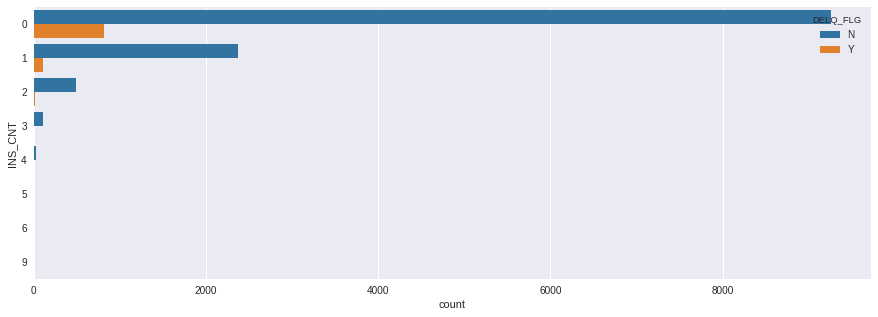

In [0]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="INS_CNT", data=df, palette=['tab:blue', 'tab:orange'], hue='DELQ_FLG')